In [2]:
import matplotlib.pyplot as plt
import numpy
import numpy as np
import pandas as pd
import os
from glob import glob
#import seaborn as sns
from PIL import Image

# np.random.seed(42)
from sklearn.metrics import confusion_matrix

import keras
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
from sklearn import svm
from sklearn.svm import SVC

2024-03-21 12:49:06.081770: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-21 12:49:06.135785: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-21 12:49:06.949108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [1]:
import subprocess

# Define the pip command to install TensorFlow GPU version
pip_command = "pip install tensorflow-gpu"

# Execute the pip command using subprocess
try:
    subprocess.check_call(pip_command.split())
    print("TensorFlow GPU version installed successfully.")
except subprocess.CalledProcessError:
    print("Error occurred while installing TensorFlow GPU version.")


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Error occurred while installing TensorFlow GPU version.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [43 lines of output]
      Traceback (most recent call last):
        File "/home/jesse/PycharmProjects/4thrYearPythonProject/venv/lib/python3.9/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "/home/jesse/PycharmProjects/4thrYearPythonProject/venv/lib/python3.9/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/home/jesse/PycharmProjects/4thrYearPythonProject/venv/lib/python3.9/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "/home/jesse/PycharmProjects/4thrYearPythonProject/venv/lib/python3.9/site-packages/setuptools/

In [5]:
print(keras.__version__)

3.1.1


In [7]:
from keras import backend as K

In [10]:
# Create a TensorFlow session config
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # Allow GPU memory allocation to grow dynamically
sess = tf.compat.v1.Session()

# Set the session config
K.set_session(sess)

AttributeError: module 'keras.backend' has no attribute 'set_session'

In [3]:
#import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [79]:
model = keras.saving.load_model(os.path.join('models', 'Densenetmodel50epochs1500resample224size.keras'))

/home/jesse/PycharmProjects/4thrYearPythonProject/venv/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1210 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [66]:
trainedModel = keras.saving.load_model(os.path.join('models', 'SequentialRelu50epochs1500resample64size.keras'))

In [80]:
dataset = pd.read_csv('HAM10000_metadata.csv')
SIZE = 224

In [81]:
labEnc = LabelEncoder()
labEnc.fit(dataset['dx'])
LabelEncoder()

dataset['label'] = labEnc.transform(dataset["dx"])
dataset.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
3117,HAM_0006863,ISIC_0030907,nv,follow_up,45.0,female,abdomen,5
7502,HAM_0001358,ISIC_0032680,nv,histo,50.0,female,back,5
1120,HAM_0003555,ISIC_0030321,df,histo,30.0,male,upper extremity,3
5310,HAM_0004119,ISIC_0025015,nv,follow_up,40.0,female,trunk,5
1607,HAM_0005303,ISIC_0033240,mel,histo,70.0,male,scalp,4
1263,HAM_0007390,ISIC_0027174,mel,histo,50.0,male,abdomen,4
2171,HAM_0002197,ISIC_0028709,mel,histo,50.0,male,back,4
6916,HAM_0002715,ISIC_0028373,nv,histo,70.0,male,back,5
8534,HAM_0000971,ISIC_0027671,nv,histo,25.0,female,unknown,5
6561,HAM_0002929,ISIC_0032068,nv,follow_up,45.0,male,lower extremity,5


In [82]:
# Dataset is imbalanced, resample the classes to remove the imbalance
ds_0 = dataset[dataset['label'] == 0]
ds_1 = dataset[dataset['label'] == 1]
ds_2 = dataset[dataset['label'] == 2]
ds_3 = dataset[dataset['label'] == 3]
ds_4 = dataset[dataset['label'] == 4]
ds_5 = dataset[dataset['label'] == 5]
ds_6 = dataset[dataset['label'] == 6]

sample_num = 1500
ds_0_balanced = resample(ds_0, replace=True, n_samples=sample_num, random_state=42)
ds_1_balanced = resample(ds_1, replace=True, n_samples=sample_num, random_state=42)
ds_2_balanced = resample(ds_2, replace=True, n_samples=sample_num, random_state=42)
ds_3_balanced = resample(ds_3, replace=True, n_samples=sample_num, random_state=42)
ds_4_balanced = resample(ds_4, replace=True, n_samples=sample_num, random_state=42)
ds_5_balanced = resample(ds_5, replace=True, n_samples=sample_num, random_state=42)
ds_6_balanced = resample(ds_6, replace=True, n_samples=sample_num, random_state=42)

# Combine the datasets together
dataset_balanced = pd.concat(
    [ds_0_balanced, ds_1_balanced, ds_2_balanced, ds_3_balanced, ds_4_balanced, ds_5_balanced, ds_6_balanced])
# Check new distribution
dataset_balanced['label'].value_counts()

label
0    1500
1    1500
2    1500
3    1500
4    1500
5    1500
6    1500
Name: count, dtype: int64

In [83]:
# Read images based on the image ID from the csv file
image_path = {os.path.splitext(os.path.basename(x))[0]: x
    for x in glob(os.path.join('all_images/', '*.jpg'))}

In [84]:
# Define the path and add as a new column
dataset_balanced['path'] = dataset['image_id'].map(image_path.get)

#use the path to read images, then convert them to 224,224 then add them to a new column called image
dataset_balanced['image'] = dataset_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

KeyboardInterrupt: 

In [85]:
# Define the maximum rotation angle
max_rotation_angle = 359  # You can adjust this as needed

# Define a function to perform random rotation
def random_rotate(image):
    rotation_angle = np.random.uniform(-max_rotation_angle, max_rotation_angle)
    return image.rotate(rotation_angle)

# Define the path and add as a new column
dataset_balanced['path'] = dataset['image_id'].map(image_path.get)

# Use the path to read images, then convert them to 224x224, apply random rotations, and add them to a new column called 'image'
#SIZE = (224, 224)
dataset_balanced['image'] = dataset_balanced['path'].map(lambda x: random_rotate(Image.open(x).resize((SIZE,SIZE))))

# Convert images to NumPy arrays
dataset_balanced['image'] = dataset_balanced['image'].map(np.asarray)

In [19]:
# Concert dataframe image attributes into a numpy array
X = np.asarray(dataset_balanced['image'].tolist())
# Scale values between 0-1 by dividing by the highest possible value (255)
X = X/255
# assign label values (what we are trying to predict) to Y, label is used instead of dx because label is an integer and the computer won't understand dx
Y = dataset_balanced['label']
# Convert to categorical as this is multiclass classification
Y_cat = to_categorical(Y,num_classes = 7)
# make training and testing partitions
# x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

In [86]:
# Define the path and add as a new column
dataset['path'] = dataset['image_id'].map(image_path.get)

#use the path to read images, then convert them to 224,224 then add them to a new column called image
dataset['image'] = dataset['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [87]:
# Concert dataframe image attributes into a numpy array
X_Balanced = np.asarray(dataset_balanced['image'].tolist())
# Scale values between 0-1 by dividing by the highest possible value (255)
X_Balanced = X_Balanced/255
# assign label values (what we are trying to predict) to Y, label is used instead of dx because label is an integer and the computer won't understand dx
Y_Balanced = dataset_balanced['label']
# Convert to categorical as this is multiclass classification
Y_Balanced_cat = to_categorical(Y_Balanced,num_classes = 7)
# make training and testing partitions
# x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

In [88]:
#Concert dataframe image attributes into a numpy array
XF = np.asarray(dataset['image'].tolist())
# Scale values between 0-1 by dividing by the highest possible value (255)
XF = XF/255
# assign label values (what we are trying to predict) to Y, label is used instead of dx because label is an integer and the computer won't understand dx
YF = dataset['label']
# Convert to categorical as this is multiclass classification
YF_cat = to_categorical(YF,num_classes = 7)
# make training and testing partitions
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.90, random_state=42)

In [90]:
yf_pred = model.predict(XF)

313/313 ━━━━━━━━━━━━━━━━━━━━ 486s 2s/step


In [91]:
y_balanced_pred = model.predict(X_Balanced)

329/329 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step


In [92]:
yf_pred_maxes = []
for row in yf_pred:
    yf_pred_maxes.append(row.argmax())

In [93]:
yf_maxes = []
for row in YF_cat:
    yf_maxes.append(row.argmax())

In [94]:
y_balanced_pred_maxes = []
for row in y_balanced_pred:
    y_balanced_pred_maxes.append(row.argmax())

In [95]:
y_balanced_maxes = []
for row in Y_Balanced_cat:
    y_balanced_maxes.append(row.argmax())

In [72]:
from sklearn.metrics import classification_report

print(classification_report(yf_maxes,yf_pred_maxes))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       327
           1       0.66      0.88      0.75       514
           2       0.49      0.79      0.60      1099
           3       0.56      0.99      0.72       115
           4       0.40      0.79      0.53      1113
           5       0.97      0.66      0.79      6705
           6       0.76      0.99      0.86       142

    accuracy                           0.72     10015
   macro avg       0.66      0.85      0.72     10015
weighted avg       0.83      0.72      0.74     10015


In [73]:
cm = confusion_matrix(yf_maxes, yf_pred_maxes)

In [74]:
print(classification_report(y_balanced_maxes,y_balanced_pred_maxes))

              precision    recall  f1-score   support

           0       0.73      0.08      0.15      1500
           1       0.45      0.22      0.30      1500
           2       0.19      0.87      0.31      1500
           3       0.64      0.16      0.25      1500
           4       0.46      0.31      0.37      1500
           5       0.54      0.33      0.41      1500
           6       0.97      0.30      0.46      1500

    accuracy                           0.33     10500
   macro avg       0.57      0.33      0.32     10500
weighted avg       0.57      0.33      0.32     10500


In [75]:
report = classification_report(y_balanced_maxes,y_balanced_pred_maxes)

# Specify the file path where you want to save the report
file_path = "1500_sequential_balanced_random_orientation_report.txt"

# Write the classification report to the file
with open(file_path, "w") as file:
    file.write(report)

print("Classification report saved to:", file_path)

Classification report saved to: 1500_sequential_balanced_random_orientation_report.txt


In [76]:
cm1 = confusion_matrix(y_balanced_maxes, y_balanced_pred_maxes)

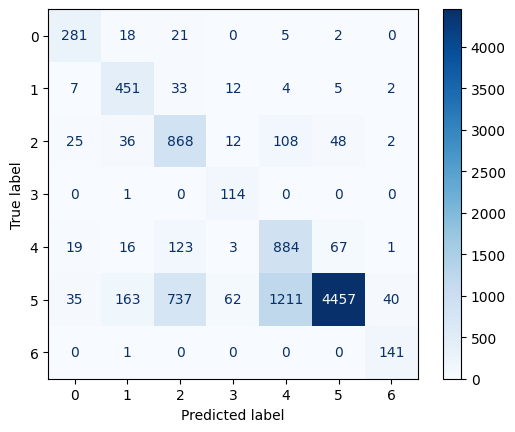

In [77]:
from sklearn import metrics
labels = np.unique(YF)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)

cm_display.plot(cmap='Blues')
plt.show()
#https://www.w3schools.com/python/python_ml_confusion_matrix.asp

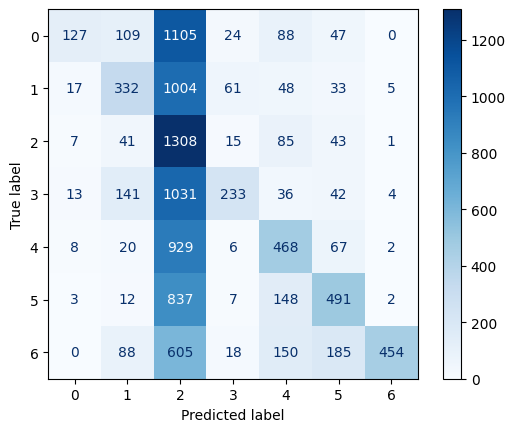

In [78]:
labels = np.unique(Y_Balanced)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = labels)

cm_display.plot(cmap='Blues')
plt.savefig('1500_Sequential_balanced_random_orientation_CM.png')
plt.show()

In [37]:
y_pred = model.predict(X)

 32/329 ━━━━━━━━━━━━━━━━━━━━ 7:02 1s/step

KeyboardInterrupt: 

In [49]:
y_pred_maxes = []
for row in y_pred:
    y_pred_maxes.append(row.argmax())

In [51]:
y_pred_maxes[1000]

2

In [38]:
Y_cat[2000].argmax()

4

In [39]:
y_maxes = []
for row in Y_cat:
    y_maxes.append(row.argmax())

In [45]:
y_maxes

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [52]:
cm = confusion_matrix(y_maxes, y_pred_maxes)

In [53]:
cm

array([[475,   3,  16,   0,   6,   0,   0],
       [  3, 479,  14,   0,   2,   1,   1],
       [  8,  12, 465,   0,   7,   8,   0],
       [  0,   0,   0, 500,   0,   0,   0],
       [ 12,   8,  59,   1, 404,  16,   0],
       [  2,  15,  63,   0,  26, 394,   0],
       [  0,   0,   0,   0,   0,   0, 500]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_maxes,y_pred_maxes))

In [96]:
import joblib

svm_model = joblib.load(os.path.join('models', 'svm_model.joblib'))

/home/jesse/PycharmProjects/4thrYearPythonProject/venv/lib64/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.2.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [97]:
CVM_y_pred = svm_model.predict(yf_pred)

In [99]:
CVM_y_pred_balanced = svm_model.predict(y_balanced_pred)

In [98]:
print(classification_report(yf_maxes,CVM_y_pred))

              precision    recall  f1-score   support

           0       0.63      0.94      0.76       327
           1       0.62      0.90      0.74       514
           2       0.54      0.78      0.64      1099
           3       0.50      1.00      0.66       115
           4       0.48      0.77      0.59      1113
           5       0.98      0.73      0.84      6705
           6       0.80      1.00      0.89       142

    accuracy                           0.76     10015
   macro avg       0.65      0.87      0.73     10015
weighted avg       0.84      0.76      0.78     10015


In [100]:
print(classification_report(y_balanced_maxes,CVM_y_pred_balanced))

              precision    recall  f1-score   support

           0       0.65      0.01      0.01      1500
           1       0.40      0.20      0.27      1500
           2       0.22      0.71      0.34      1500
           3       0.70      0.04      0.07      1500
           4       0.29      0.33      0.31      1500
           5       0.57      0.10      0.17      1500
           6       0.43      0.81      0.56      1500

    accuracy                           0.31     10500
   macro avg       0.47      0.31      0.25     10500
weighted avg       0.47      0.31      0.25     10500


In [105]:
report = classification_report(y_balanced_maxes,CVM_y_pred_balanced)

# Specify the file path where you want to save the report
file_path = "1500_svm_balanced_random_orientation_report.txt"

# Write the classification report to the file
with open(file_path, "w") as file:
    file.write(report)

print("Classification report saved to:", file_path)

Classification report saved to: 1500_svm_balanced_random_orientation_report.txt


In [103]:
SVMcm = confusion_matrix(y_balanced_maxes, CVM_y_pred_balanced)

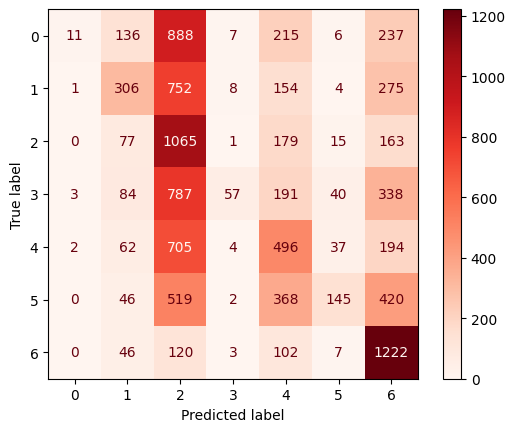

In [106]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = SVMcm, display_labels = labels)

cm_display.plot(cmap='Reds')
plt.savefig('1500_svm_balanced_random_orientation_CM.png')
plt.show()
#https://www.w3schools.com/python/python_ml_confusion_matrix.asp